In [99]:
from __future__ import division, print_function, absolute_import
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy.signal import find_peaks
# The scipy KDTree does not allow for 'seuclidean' distance metric
# so we will use the BallTree class instead.

In [100]:
def K(x, xi, h):
    return np.exp(-0.5*((x - xi)**2) / (h**2))* (1/(h*np.sqrt(2*np.pi)))

def kde_calc_plot(file_name, width, height, c, lower, upper, nums, num_bins, color_list, hist_input, kde_input, save=False,
                 single_data=False, single_dname=None, plot=True):
    # Creates a pandas data frame from an excel file and a specified column
    df = pd.read_excel(file_name)

    if single_data == True:
        new_list = [single_dname]
        color_list = [color_list[0]]
        error_list = [single_dname + ' Error']
    else:
        # Creates a list of the columns in the data frame
        column_list = df.columns.tolist()
        # List comprehension creating a list of the non-error columns in the data frame
        new_list = [column for column in column_list if 'Error' not in column]
        # List comprehension creating a list of the error columns in the data frame
        error_list = [column for column in column_list if 'Error' in column]

    if plot == True:
        fig, ax = plt.subplots(len(new_list), 1, figsize=(width, height))
        plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    
    # Provides length of new_list; used later on during plotting
    num_samples = len(new_list)
    counter = 0
    
    # Joins corresponding values in new_list, color_list, and error_list and iterates through them
    for column, the_color, error_col in zip(new_list, color_list, error_list):
        mask = ~np.isnan(df[column]) & ~np.isnan(df[error_col])
        # Eliminates all NaN entries in a specified non-error column of the data frame
        data = df[column][mask]
        # Eliminates all NaN entries in a specified error column of the data frame
        errors = df[error_col][mask]
        # Finds the maximum value of the error values in error_list
        error_max = max(errors)
        # Creates an array of evenly spaced numbers over a specified interval
        x_vals = np.linspace(lower, upper, nums)
        # Returns an all-zero array with the same shape and data type as the input
        total_sum = np.zeros_like(x_vals)
        # Sets up subplots and specifies their size
    
        # Joins corresponding xi and e values in data and errors and iterates through them
        for xi, e in zip(data, errors):
            # Sets the bandwidth (h) equal to the square root of error_max times by a c-value slightly greater than 1
            # squared minus e squared
            h = np.sqrt((c*error_max)**2 - (e)**2)
            # Runs x_vals - xi divided by h through the previously defined KDE function
            # Adds the result of this calculation to the array in total_sum
            total_sum += K(x_vals, xi, h)
        # Completes the KDE function by dividing total_sum by h times the number of data points in the column
        y_vals = total_sum/len(data)
            
        # Plots histogram and KDE
        if hist_input == True and kde_input == True:
            if single_data == True:
                ax = [ax]
            ax[counter].plot(x_vals, y_vals, color='black')
            peaks, _ = find_peaks(y_vals, distance=20)
            ax[counter].plot(x_vals[peaks], y_vals[peaks], 'x', color='gray')
            
            peak_vals = x_vals[peaks].tolist()
            cell_vals = []
            for val in peak_vals:
                new_val = round(val)
                cell_vals.append(new_val)
                
            for val1, val2, val3 in zip(cell_vals, x_vals[peaks], y_vals[peaks]):
                ax[counter].annotate(f'{val1}', (val2, val3))
               
            ax[counter].hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
            ax[counter].text(0.05, 0.8, column + ' (n = ' + str(len(data)) + ')', transform=ax[counter].transAxes)
        
        # Plots only KDE
        elif kde_input == True:
            ax[counter].plot(x_vals, y_vals, color=the_color)
            peaks, _ = find_peaks(y_vals, distance = 20)
            ax[counter].plot(x_vals[peaks], y_vals[peaks], 'x', color='gray')
                
            peak_vals = x_vals[peaks].tolist()
            cell_vals = []
            for val in peak_vals:
                new_val = round(val)
                cell_vals.append(new_val)
                
            for val1, val2, val3 in zip(cell_vals, x_vals[peaks], y_vals[peaks]):
                ax[counter].annotate(f'{val1}', (val2, val3))
                
            ax[counter].text(0.05, 0.8, column + ' (n = ' + str(len(data)) + ')', transform=ax[counter].transAxes)
        
        elif hist_input == True:
            ax[counter].hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
            ax[counter].text(0.05, 0.8, column + ' (n = ' + str(len(data)) + ')', transform=ax[counter].transAxes)
            
        counter += 1
            
    # Labels x-axis
    plt.xlabel('Age (Ma)')
        
    # Saves final graphs as pngs
    if save == True:
        print('working')
        plt.savefig('c-'+str(c).split('.')[1]+'.png', dpi=400, bbox_inches='tight')

    # Shows final graphs
    plt.show()

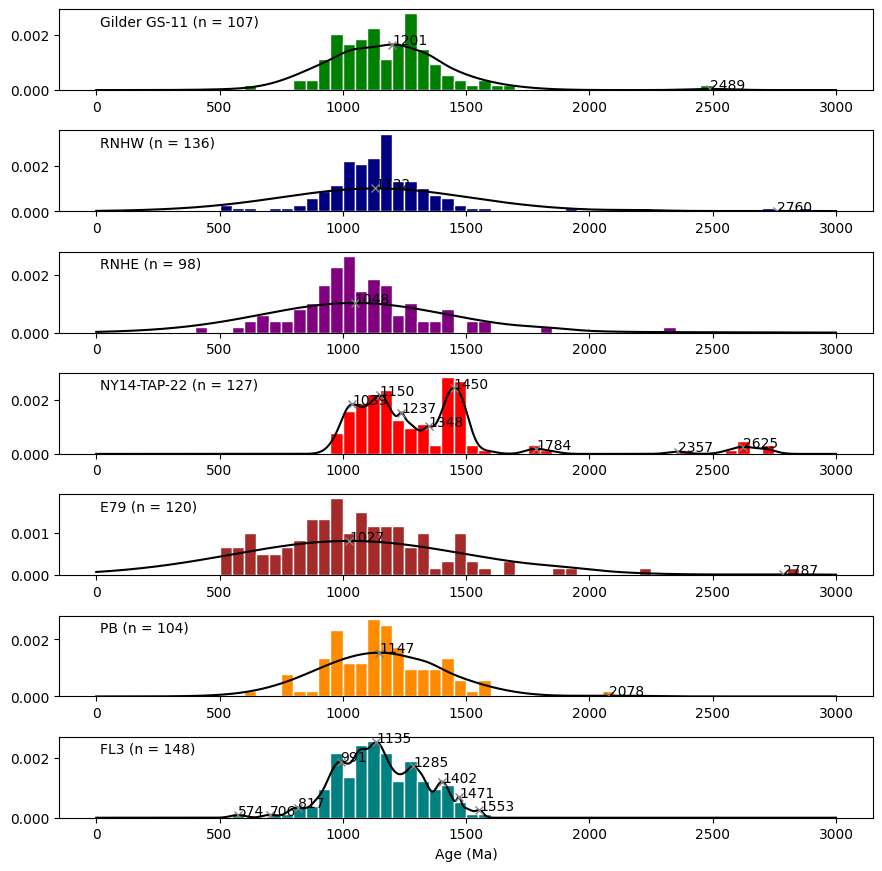

In [101]:
kde_calc_plot('ForAgeCalc.xlsx', 10.5, 10.5, 1.04, 0, 3000, 1000, 50, ['green', 'navy', 'purple', 'red', 'brown', 'darkorange', 'teal'], True, True)